## Bayesian Logistic Ridge Regression
Script Name: Model_Analysis.ipynb

Author: Brian Cain


This notebook takes the cleaned and feature engineering data from modelData.csv and uses it to create a Bayesian Logistic Ridge Regression model. It then analyzes the results of this model using posterior predictive distributions and comparing its performance to frequentist bayesian logistic regression. 

<hr>

In [1]:
##Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Pull in and display the data
data = pd.read_csv('D:\\College_Football_Model_Data\\modelData.csv')
data.head()

,gameId,school,week_num,gameSeason,win,offDiff_rush_td_movAvg,defDiff_pass_td_movAvg,offDiff_yp_rush_movAvg,defDiff_pass_yards_movAvg,offDiff_total_yards_movAvg,defDiff_turnovers_movAvg,defDiff_firstDowns_movAvg,defDiff_offensive_ppa_movAvg,offDiff_offensive_powerSuccess_movAvg,defDiff_completion_pct_movAvg,defDiff_third_pct_movAvg,gameDiff_gameControl_movAvg,gameDiff_elo_movAvg
0,400764869,Temple,3,2015.0,1.0,-1.333333,-0.333333,-0.433333,-13.833333,-151.000000,0.666667,1.000000,-0.047219,-0.089744,-0.034619,0.046491,6.750000,324.833333
1,400763604,UTEP,3,2015.0,1.0,-1.333333,1.333333,-1.133333,57.333333,-190.000000,-0.666667,4.333333,0.346266,0.111111,0.055580,0.150253,-2.833333,225.666667
2,400756922,Georgia Tech,3,2015.0,0.0,2.500000,-1.333333,2.566667,-44.500000,148.666667,1.333333,-4.833333,-0.166122,0.444444,-0.098090,0.070130,1.708333,172.333333
3,400603852,South Carolina,3,2015.0,0.0,0.666667,-0.666667,2.233333,30.333333,53.333333,1.000000,0.333333,-0.097716,-0.022222,0.034252,-0.064306,-9.833333,-240.333333
4,400603853,Kentucky,3,2015.0,0.0,1.333333,-1.666667,3.300000,-45.000000,100.333333,0.666667,1.333333,-0.124125,-0.111111,-0.050671,-0.135313,-4.500000,-290.333333


In [2]:
##Perform z-score normalization of the data
def z_score_normalization(df,col):
    
    ##Compute variables necessary for this 
    mu = np.mean(df[col])
    std = np.std(df[col])
    
    ##Replace column with normalized column
    df[col] = (df[col]-mu)/std
    
    return df

##Now perform normalization
predictors = ['offDiff_rush_td_movAvg', 'defDiff_pass_td_movAvg',
       'offDiff_yp_rush_movAvg', 'defDiff_pass_yards_movAvg',
       'offDiff_total_yards_movAvg', 'defDiff_turnovers_movAvg',
       'defDiff_firstDowns_movAvg', 'defDiff_offensive_ppa_movAvg',
       'offDiff_offensive_powerSuccess_movAvg',
       'defDiff_completion_pct_movAvg', 'defDiff_third_pct_movAvg',
       'gameDiff_gameControl_movAvg', 'gameDiff_elo_movAvg']
for i in predictors:
    data = z_score_normalization(data,i)
data.head()

,gameId,school,week_num,gameSeason,win,offDiff_rush_td_movAvg,defDiff_pass_td_movAvg,offDiff_yp_rush_movAvg,defDiff_pass_yards_movAvg,offDiff_total_yards_movAvg,defDiff_turnovers_movAvg,defDiff_firstDowns_movAvg,defDiff_offensive_ppa_movAvg,offDiff_offensive_powerSuccess_movAvg,defDiff_completion_pct_movAvg,defDiff_third_pct_movAvg,gameDiff_gameControl_movAvg,gameDiff_elo_movAvg
0,400764869,Temple,3,2015.0,1.0,-1.371113,-0.399361,-0.374039,-0.262128,-1.743327,0.938524,0.203776,-0.354374,-0.651392,-0.444200,0.500301,1.375274,1.300499
1,400763604,UTEP,3,2015.0,1.0,-1.371113,1.441503,-0.947174,0.798175,-2.181374,-0.964484,1.017180,2.496855,0.710578,0.710779,1.656307,-0.440968,0.947893
2,400756922,Georgia Tech,3,2015.0,0.0,2.502526,-1.503880,2.082252,-0.719026,1.622522,1.890027,-1.219681,-1.215956,2.970868,-1.256929,0.763657,0.419773,0.758256
3,400603852,South Carolina,3,2015.0,0.0,0.649916,-0.767534,1.809331,0.395906,0.551740,1.414276,0.041095,-0.720285,-0.193538,0.437671,-0.734100,-1.767614,-0.709059
4,400603853,Kentucky,3,2015.0,0.0,1.323592,-1.872053,2.682679,-0.726476,1.079643,0.938524,0.285116,-0.911648,-0.796282,-0.649748,-1.525188,-0.756836,-0.886843


### Defining the Log-Posterior

In [3]:
##Define function to compute log-likelihood
def logLike(y,x,betas):
    
    ##Compute eta
    eta = np.matmul(x,betas)
    
    ##Compute sum 1 (sum(y_i * eta_i))
    sum1 = sum(y*eta)
    
    ##Compute sum 2 (sum(ln(1+e^(eta_i))))
    sum2 = sum(np.log((1+np.exp(eta))))
    
    ##Compute the final likelihood
    computed_logLike = sum1 - sum2
    
    return computed_logLike

##Define function to compute log prior for betas
def beta_logPrior(betas,lambda_):
    
    computed_betaPrior = sum(np.log((lambda_**(.5))*np.exp(((betas*betas)*-lambda_))))
    
    return computed_betaPrior

##Define function to compute log prior of lambda (shrinkage parameter)
def lambda_logPrior(lambda_):
    
    computed_lambdaPrior = np.log(np.exp(-1.5*lambda_))
    
    return computed_lambdaPrior

##Define function that computes the log posterior
def logPosterior(y,x,betas,lambda_):
    
    ##Add up log likelihood, and the priors
    computed_logPost = logLike(y,x,betas) + beta_logPrior(betas,lambda_) + lambda_logPrior(lambda_)
    
    return computed_logPost

### Metropolis-Hastings Algorithm

<b>Proposal Distribution:</b>

Frequentist comparison: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
##Import necessary distributions
from scipy.stats import multivariate_normal
from scipy.stats import uniform
from scipy.stats import multivariate_t

##Define function the generates new sample from the proposal distribution 
def generateProposal(beta,lambda_,cov):
    
    ##Draw sample from multivarate normal and uniform
    beta_star = multivariate_normal(beta,cov).rvs()
    lambda_star = uniform(0,2).rvs()
    
    return beta_star, lambda_star

##Define function that gives the log probability of acceptance
def log_acceptProb(beta_star,beta,lambda_star,lambda_,cov,y,x):
    
    ##Compute proposal distribution probabilities
    prop_star_t = multivariate_normal(beta,cov).pdf(beta_star) ##J_t(theta*|theta^(t-1))
    prop_t = multivariate_normal(beta_star,cov).pdf(beta) ##J_t(theta^(t-1)|theta*))
    prop_star_exp =  uniform(0,2).pdf(lambda_star)
    prop_exp = uniform(0,2).pdf(lambda_)
    
    ##Compute log posterior probabilities
    post_star = logPosterior(y,x,beta_star,lambda_star)
    post = logPosterior(y,x,beta,lambda_)
    
    ##Compute the acceptance probability
    p = post_star + np.log((prop_t*prop_exp)) - post - np.log((prop_star_t*prop_star_exp))
    
    return np.min([np.log(1),p])

In [6]:
x = data[predictors].to_numpy()
y = data['win'].to_numpy()
i = np.ones((len(y),1))
x = np.hstack((i,x))

In [51]:
##Define the coded process for the metropolis-hastings algorithm

##Create storage location for sampling algorithm
mh_samps = []
accept = 0
np.random.seed(2)
matrixSize = 14
cov = np.random.rand(matrixSize, matrixSize)
cov = np.dot(cov, cov.transpose())*.00016

##Initial Values
beta = np.array([-0.34898289,-0.07019993,  0.03887642,  0.08730674, -0.01601029, -0.01449917,
        -0.01014086, -0.00564236, -0.11190569, -0.06597375,  0.1661603 ,
         0.03983892,  2.36169154, -0.10165575])
lambda_= 1
for i in range(100000):
    
    ##Draw sample from proposal
    beta_star,lambda_star = generateProposal(beta,lambda_,cov)
    
    ##Compute the acceptance probability
    p = log_acceptProb(beta_star,beta,lambda_star,lambda_,cov,y,x)
    
    ##Determine if we will accept the sample
    if np.log(np.random.uniform(0,1)) < p:
        beta = beta_star
        lambda_ = lambda_star
        accept += 1
        
    mh_samps.append(np.append(beta,lambda_))

In [52]:
accept/100000

0.21802

-0.3450129882010482


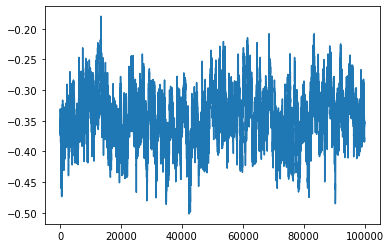

In [58]:
d = []
for i in mh_samps:
    d.append(i[0])
print(np.mean(d))
plt.plot(d)

(array([  165.,  1359.,  6376., 18328., 27789., 26525., 13686.,  4667.,
         1055.,    50.]),
 array([-0.50173169, -0.46952771, -0.43732373, -0.40511975, -0.37291577,
        -0.3407118 , -0.30850782, -0.27630384, -0.24409986, -0.21189588,
        -0.17969191]),
 <BarContainer object of 10 artists>)

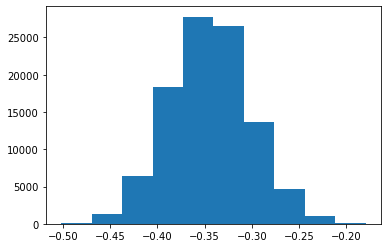

In [59]:
plt.hist(d)

In [284]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',random_state=0).fit(data[predictors].to_numpy(), y)

In [285]:
clf.coef_

array([[-0.07019993,  0.03887642,  0.08730674, -0.01601029, -0.01449917,
        -0.01014086, -0.00564236, -0.11190569, -0.06597375,  0.1661603 ,
         0.03983892,  2.36169154, -0.10165575]])